In [19]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
init_notebook_mode(connected=True)
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/bitcoin.csv')

In [3]:
df.shape

(2016354, 8)

In [4]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,1541894160,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,1541894220,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,1541894280,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,1541894340,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,1541894400,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

In [6]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,2018-11-10 23:56:00,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,2018-11-10 23:57:00,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,2018-11-10 23:58:00,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,2018-11-10 23:59:00,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,2018-11-11 00:00:00,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [7]:
df.set_index('Timestamp', inplace=True)

In [8]:
df = df.resample('D').mean()

In [9]:
df_month = df.resample('M').mean()

In [10]:
iplot([go.Scatter(x=df_month.index, y=df_month.Weighted_Price, mode='markers')])

In [11]:
iplot([go.Bar(x=df_month.index, y=df_month.Weighted_Price)])

In [12]:
trace = go.Scatter(
    x = df.index,
    y = df.Weighted_Price,
    mode = 'lines',
    name = 'Weighted Price'
)

layout = dict(
    title='Bitcoin Weighted Prices ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [13]:
series = df_month.Weighted_Price
result = seasonal_decompose(series, model='additive')

In [14]:
iplot([go.Scatter(x=series.index, y=result.trend, mode='lines')])

In [15]:
iplot([go.Scatter(x=series.index, y=result.seasonal, mode='lines')])

In [16]:
iplot([go.Scatter(x=series.index, y=result.resid, mode='lines')])

In [17]:
residual = result.resid
residual.dropna(inplace=True)
print('p value: ', adfuller(residual, autolag = 'AIC', regression = 'ct')[1])

p value:  0.02195703572368413


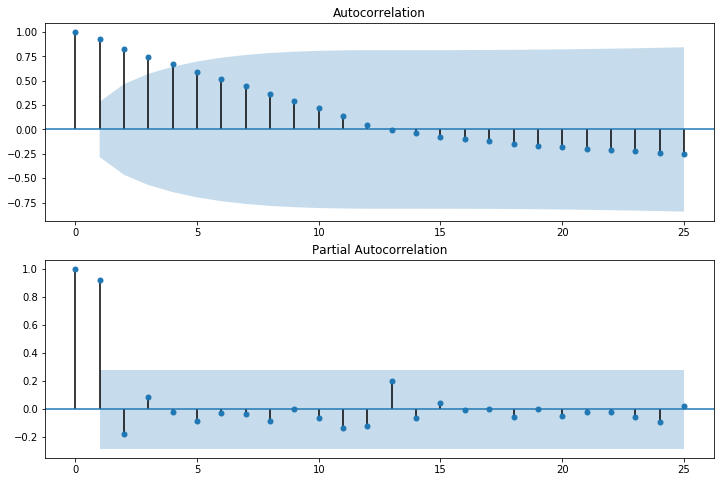

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month.Weighted_Price, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month.Weighted_Price, lags=25, ax=ax2)
plt.show()

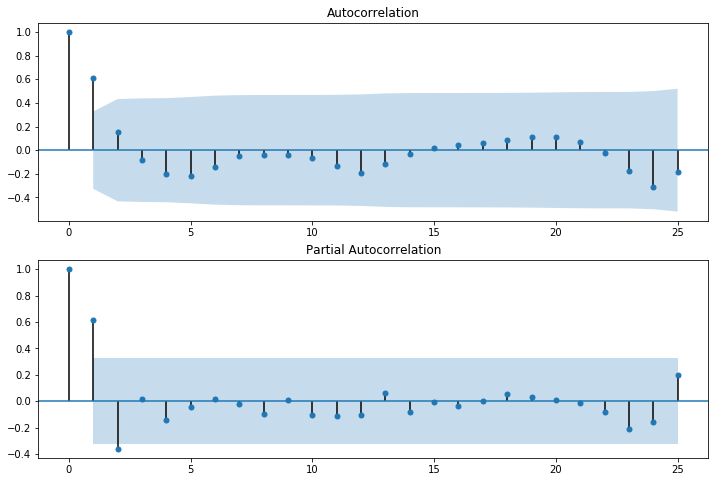

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(result.resid, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(result.resid, lags=25, ax=ax2)
plt.show()